In [1]:
import stat_helper
import hdf_helper
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re
from dateutil.parser import parse
import datetime
import h5py
import os

GLOBAL_SAMPLING_FREQ = 10
GLOBAL_DAILY_SAMPLES = 24 * 60 * 60 * 10


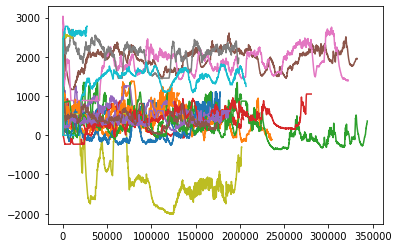

In [7]:
files = os.listdir('C:/Users/nikas/Documents/GitHub/2020_Challenge_IOT_Analytics/competitionfiles')
lim = 0
for file in files:
    df = hdf_helper.h5_to_df('competitionfiles/' + file)
    res = stat_helper.smooth_values(df)
    plt.plot(np.arange(len(res['ch_1'])), res['ch_1'].to_numpy())
    lim += 1
    if lim == 20:
        break

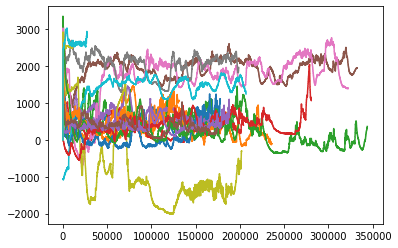

In [8]:
files = os.listdir('C:/Users/nikas/Documents/GitHub/2020_Challenge_IOT_Analytics/competitionfiles')
lim = 0
for file in files:
    df = hdf_helper.h5_to_df('competitionfiles/' + file)
    plt.plot(np.arange(len(df['ch_1'])), df['ch_1'].to_numpy())
    lim += 1
    if lim == 20:
        break

In [10]:
channel_df = pd.DataFrame()
files = os.listdir('./competitionfiles')

channel_id = 'ch_1'
i = 0

for file in files:
    df = hdf_helper.h5_to_df('competitionfiles/' + file)
    print(len(df[channel_id]), df.sample_rate)
    del df

channel_df

177709 8.333333
236148 8.333333
201714 8.333333
203992 8.333333
182031 8.333333
332270 8.333333
322373 8.333333
198649 8.333333
201922 8.333333
206941 8.333333
172768 8.333333
131480 8.333333
343940 8.333333
280604 8.333333
188469 8.333333
174216 8.333333
1791 8.333333
1138 8.333333
10420 8.333333
27293 8.333333
84 8.333333
72 8.333333
36492 8.333333
17964 8.333333
55225 8.333333
30135 8.333333
149 8.333333
43189 8.333333
27108 8.333333
311 8.333333
171 8.333333
2190 8.333333
8186 8.333333
8344 8.333333
353 8.333333
3155 8.333333
8537 8.333333
7523 8.333333
851 8.333333
4024 8.333333
2 8.333333
913 8.333333
12841 8.333333
176 8.333333
24842 8.333333
1776 8.333333
21272 8.333333
209 8.333333
3307 8.333333
11168 8.333333
56615 8.333333
2 8.333333
23267 8.333333
54 8.333333
31293 8.333333
20902 8.333333
5838 8.333333
62194 8.333333
19590 8.333333
167458 8.333333
498 8.333333
3 8.333333
1450 8.333333
4 8.333333
15531 8.333333
5959 8.333333
1403 8.333333
18089 8.333333
12135 8.333333
416 8.

KeyboardInterrupt: 

In [106]:
f = h5py.File('competitionfiles\COOLCAT_20091219_074253_24_20091219_074253_240.hdf', 'r')
split = str(f['DYNAMIC DATA'].attrs['FIRST ACQ TIMESTAMP']).split("'")[1].split(' ')
date = split[0].split('/')
year = int(date[0])
month = int(date[1])
day = int(date[2])
time = split[1].split(':')
hour = int(time[0])
minute = int(time[1])
second = int(time[2].split('.')[0])
millisecond = int(time[2].split('.')[1]) * 1000
test_date = datetime.datetime(year, month, day, hour, minute, second, millisecond)

In [53]:
df = hdf_helper.h5_to_df('competitionfiles\COOLCAT_20091219_074253_24_20091219_074253_240.hdf')

In [70]:
channels = list(df.columns)

files = os.listdir('./competitionfiles')

files_missing_info = []
files_with_diff_freqs = []
for file in files:
    f = h5py.File('competitionfiles/' + file)
    freq = []
    for channel in df.columns:
        try:
            freq.append(f['DYNAMIC DATA'][channel].attrs['SAMPLE RATE'])
        except:
            files_missing_info.append(file)
            break
    if len(set(freq)) != 1:
        files_with_diff_freqs.append(file)


In [72]:
len(files_with_diff_freqs)

0

In [108]:
channel_0_info = 

TimedeltaIndex(['07:42:52.640000', '07:42:52.540000', '07:42:52.440000',
                '07:42:52.340000', '07:42:52.240000', '07:42:52.140000',
                '07:42:52.040000', '07:42:51.940000', '07:42:51.840000',
                '07:42:51.740000',
                ...
                '16:17:06.360000', '16:17:06.460000', '16:17:06.560000',
                '16:17:06.660000', '16:17:06.760000', '16:17:06.860000',
                '16:17:06.960000', '16:17:07.060000', '16:17:07.160000',
                '16:17:07.260000'],
               dtype='timedelta64[ns]', length=864000, freq=None)